In [1]:
import os

import pandas
import numpy
import matplotlib.pyplot as plt

from ProblemInstance import ProblemInstance
from baseline_intra import bl_intra_1
from baseline_request import bl_req_FCFS
from our_approach import leader_follower

In [2]:
fontsize = 15
neurosim_dir = "NetStructure"  # directory store network structure description file following NeuroSim
summary_file = "NeuroSIMOut/summary.csv"  # simulation result get from NeuroSim

In [3]:
def get_xb_utilization(problem, plan): 
    return problem.utilization_xb(*problem.get_pc_packages_from_plan(*plan))

def get_buf_utilization(problem, plan):
    return problem.utilization_buf(*problem.get_pc_packages_from_plan(*plan))

def cumulative_utilization(utilization, time):
    cumulate_t = 0
    cumulate_u = 0
    for u, t in zip(utilization, time):
        cumulate_t += t
        cumulate_u += u*t
    return cumulate_u / cumulate_t * 100

In [4]:
seed = 10
n_req = 200

intra_xb_utilization = []
inter_xb_utilization = []
our_xb_utilization = []

multi_model_problem = ProblemInstance(neurosim_dir)
multi_model_problem.read_nn_profile(summary_file)
N_M = multi_model_problem.N_M
nn_ids = numpy.argsort(multi_model_problem.profile["L"])[::-1]
for i in range(1, N_M):
    multi_model_problem.get_random_requests(n_req, nn_ids=nn_ids[:i+1], seed=seed)
    
    plan_intra = bl_intra_1(multi_model_problem)
    intra_xb_utilization.append(cumulative_utilization(*get_xb_utilization(multi_model_problem, plan_intra)))
    
    package_inter = bl_req_FCFS(multi_model_problem)
    inter_xb_utilization.append(cumulative_utilization(*multi_model_problem.utilization_xb(*package_inter)))
    
    plan_our = leader_follower(multi_model_problem)
    our_xb_utilization.append(cumulative_utilization(*get_xb_utilization(multi_model_problem, plan_our)))

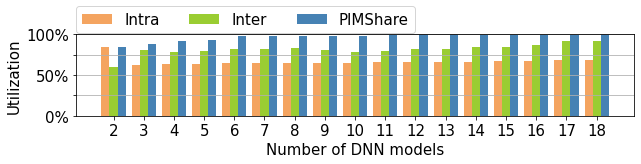

In [5]:
plt.figure(figsize=(10, 1.5))

names = numpy.arange(2, N_M+1)
n_col = 3
width = 6
width_per_col = width/n_col
base_xticks = numpy.arange(len(names)) * (width+1.5)
plt.bar(base_xticks-width/2, intra_xb_utilization, width=width_per_col, label="Intra", color="sandybrown")
plt.bar(base_xticks-width/2 + width_per_col, inter_xb_utilization, width=width_per_col, label="Inter", color="yellowgreen")
plt.bar(base_xticks-width/2 + width_per_col*2, our_xb_utilization, width=width_per_col, label="PIMShare", color="steelblue")


plt.xticks(ticks=base_xticks-width_per_col/2, labels=names,rotation=0, fontsize=fontsize)
plt.yticks(ticks=[0, 25,50,75,100], labels=["0%","","50%","","100%"], fontsize=fontsize)
plt.gca().yaxis.offsetText.set_fontsize(fontsize)
plt.xlabel("Number of DNN models", fontsize=fontsize)
plt.ylabel("Utilization", fontsize=fontsize)
plt.ylim((0,100))
plt.legend(ncol=3, loc=(0, 1.01), fontsize=fontsize)
plt.grid(axis='y')
plt.show()

In [6]:
seed = 1
n_req = 200
n_req_step = 20
n_req_start = n_req//n_req_step

intra_xb_utilization = []
inter_xb_utilization = []
our_xb_utilization = []

multi_model_problem = ProblemInstance(neurosim_dir)
multi_model_problem.read_nn_profile(summary_file)
N_M = multi_model_problem.N_M
for i in range(n_req_start, n_req+n_req//n_req_step, n_req//n_req_step):
    multi_model_problem.get_random_requests(i, seed=seed)
    
    plan_intra = bl_intra_1(multi_model_problem)
    intra_xb_utilization.append(cumulative_utilization(*get_xb_utilization(multi_model_problem, plan_intra)))
    
    package_inter = bl_req_FCFS(multi_model_problem)
    inter_xb_utilization.append(cumulative_utilization(*multi_model_problem.utilization_xb(*package_inter)))
    
    plan_our = leader_follower(multi_model_problem)
    our_xb_utilization.append(cumulative_utilization(*get_xb_utilization(multi_model_problem, plan_our)))

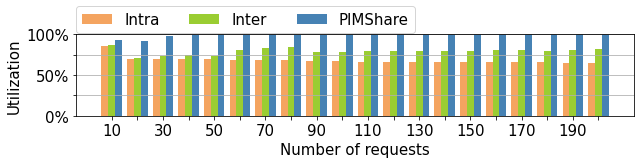

In [7]:
plt.figure(figsize=(10, 1.5))
names = numpy.arange(n_req_start, n_req+n_req//n_req_step, n_req//n_req_step)
n_col = 3
width = 6
width_per_col = width/n_col
base_xticks = numpy.arange(len(names)) * (width+1.5)
plt.bar(base_xticks-width/2, intra_xb_utilization, width=width_per_col, label="Intra", color="sandybrown")
plt.bar(base_xticks-width/2 + width_per_col, inter_xb_utilization, width=width_per_col, label="Inter", color="yellowgreen")
plt.bar(base_xticks-width/2 + width_per_col*2, our_xb_utilization, width=width_per_col, label="PIMShare", color="steelblue")

plt.xticks(ticks=base_xticks-width_per_col/2, labels=[n if i%2==0 else "" for i,n in enumerate(names)],rotation=0, fontsize=fontsize)
plt.yticks(ticks=[0, 25,50,75,100], labels=["0%","","50%","","100%"], fontsize=fontsize)
plt.gca().yaxis.offsetText.set_fontsize(fontsize)
# plt.yscale("log")
plt.xlabel("Number of requests", fontsize=fontsize)
plt.ylabel("Utilization", fontsize=fontsize)
plt.ylim((0,100))
plt.legend(ncol=3, loc=(0, 1.01), fontsize=fontsize)
plt.grid(axis='y')
plt.show()